# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [3]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [4]:
# Your code here
df = pd.read_csv('data/ames.csv', index_col=0)

The following code checks that you loaded the data correctly:

In [5]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [6]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [7]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

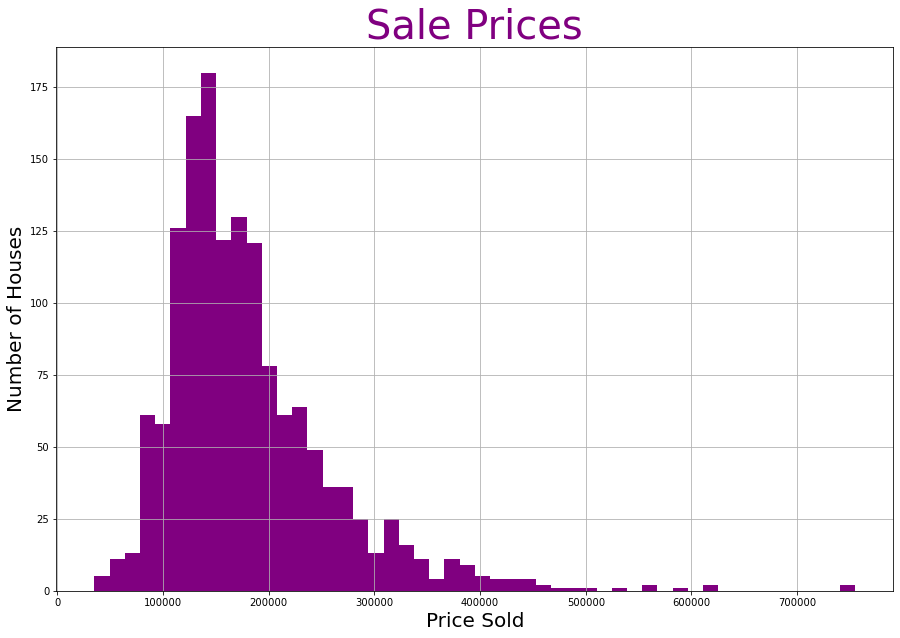

In [83]:
# Your code here
ax = df.hist(column='SalePrice',
             bins = 50,
             figsize = (15,10),
             color = 'Purple')

ax = ax[0]
for x in ax:
    x.set_title('Sale Prices', fontsize = 40, color = 'purple')
    x.set_xlabel('Price Sold', fontsize = 20)
    x.set_ylabel('Number of Houses', fontsize = 20)
    

Now, print out the mean, median, and standard deviation:

In [77]:
# Your code here
print("Mean: ", df['SalePrice'].mean().round(4))
print("Median: ", df['SalePrice'].median().round(4))
print("Standard Deviation: ", df['SalePrice'].std().round(4))

Mean:  180921.1959
Median:  163000.0
Standard Deviation:  79442.5029


In the cell below, interpret the above information.

In [ ]:
# Replace None with appropriate text
"""
The majority of houses were sold around the median value of $163,000 but the mean is higher at over $180,000.
This is because of the outlier houses that were sold for significantly higher than the majority.
"""

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

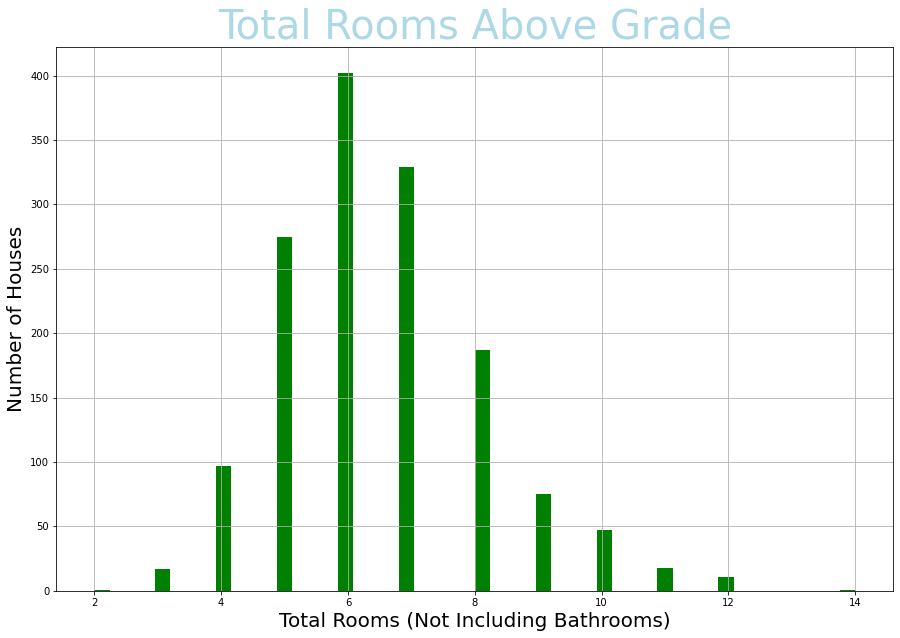

In [97]:
# Your code here
ay = df.hist(column = 'TotRmsAbvGrd',
             bins = 50,
             figsize = (15,10),
             color = 'green'
            )

ay = ay[0]
for y in ay:
    y.set_title('Total Rooms Above Grade', fontsize = 40, color = 'lightblue')
    y.set_xlabel('Total Rooms (Not Including Bathrooms)', fontsize = 20)
    y.set_ylabel('Number of Houses', fontsize = 20)

Now, print out the mean, median, and standard deviation:

In [100]:
# Your code here
print("Mean: ", df['TotRmsAbvGrd'].mean().round(4))
print("Median: ", df['TotRmsAbvGrd'].median().round(4))
print("Standard Deviation: ", df['TotRmsAbvGrd'].std().round(4))

Mean:  6.5178
Median:  6.0
Standard Deviation:  1.6254


In the cell below, interpret the above information.

In [101]:
# Replace None with appropriate text
"""
This graph is closer than the previous graph. The median (6 rooms in a house) and the mean (6.5 rooms in a house) are
fairly close. The reason why the mean is 0.5 rooms higher because of the expensive outlier houses with more rooms.
"""

'\nThis graph is closer than the previous graph. The median (6 rooms in a house) and the mean (6.5 rooms in a house) are\nfairly close. The reason why the mean is 0.5 rooms higher because of the expensive outlier houses with more rooms.\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

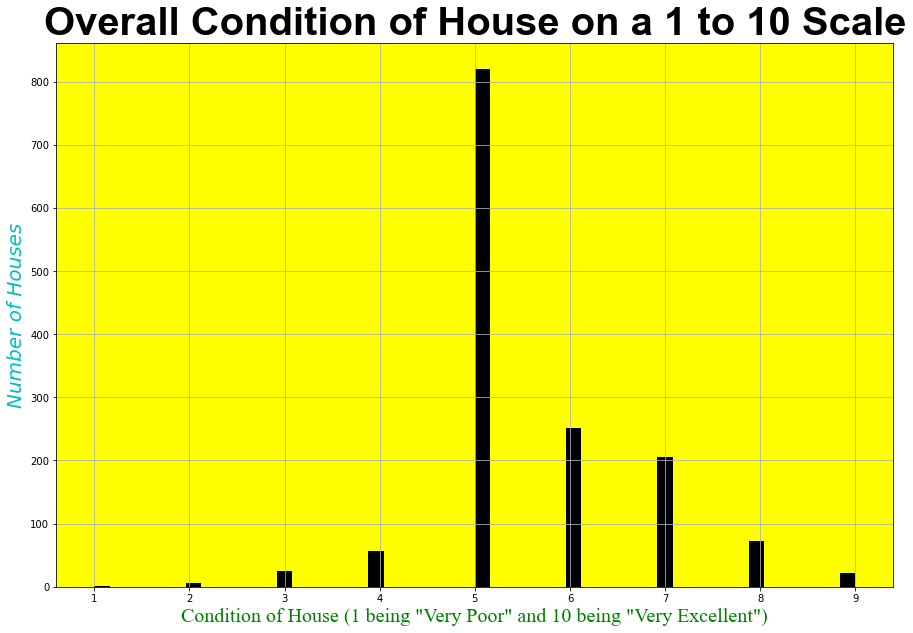

In [138]:
# Your code here
az = df.hist(column = 'OverallCond',
             bins = 50,
             figsize = (15,10),
             color = 'k'
            )

az = az[0]
for z in az:
    z.set_title('Overall Condition of House on a 1 to 10 Scale', fontname = 'Arial', fontsize = 40, fontweight = 'bold')
    z.set_xlabel('Condition of House (1 being "Very Poor" and 10 being "Very Excellent")', fontname = 'Times New Roman', fontsize = 20, color = 'g')
    z.set_ylabel('Number of Houses', fontsize = 20, fontstyle = 'italic', color = 'c' )
    z.set_facecolor('yellow')

Now, print out the mean, median, and standard deviation:

In [139]:
# Your code here
print("Mean: ", df['OverallCond'].mean())
print("Median: ", df['OverallCond'].median())
print("Standard Deviation: ", df['OverallCond'].std())

Mean:  5.575342465753424
Median:  5.0
Standard Deviation:  1.1127993367127316


In the cell below, interpret the above information.

In [140]:
# Replace None with appropriate text
"""
The mean is a 5.6 and the median is a 5. Most houses have a condition of 5, but the mean shows us that there are more houses
in better condition (6-10) than houses in poorer contion (1-4). 
"""

'\nThe mean is a 5.6 and the median is a 5. Most houses have a condition of 5, but the mean shows us that there are more houses\nin better condition (6-10) than houses in poorer contion (1-4). \n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [141]:
# Replace None with appropriate code
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [142]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

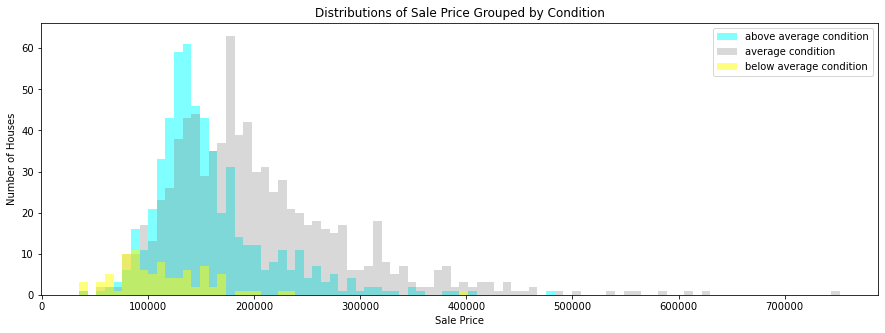

In [143]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [144]:
# Replace None with appropriate text
"""
Most houses are in average condition from this graph, which reflects the previous graph on the average rating fairly accurately.
The mean was also higher than the median, so we can also see that there are many more houses that were in above average condition
than houses in below average condition.

We see that the 'below average condition' houses are typically sold for cheaper than the majority of houses. However, we also see
that the 'above average condition' houses aren't being sold higher than 'average condition' houses and that seems 'surprising.'

The majority of 'below average condition' houses seem to be selling between $75,000 - $175,000
The majority of 'above average condition' houses seem to be selling around $150,000
The majority of 'average condition' houses seem to be selling between  $150,000 - $250,000

If there is any relationship between condition of the house and sale price that we can deduce from this, I'd say that as long
the house isn't in bad condition, it will sell well. However, I would want to break the categories up even further... possibly
keeping it with the original ratings of 1 through 10.
"""

"\nMost houses are in average condition from this graph, which reflects the previous graph on the average rating fairly accurately.\nThe mean was also higher than the median, so we can also see that there are many more houses that were in above average condition\nthan houses in below average condition.\n\nWe see that the 'below average condition' houses are typically sold for cheaper than the majority of houses. However, we also see\nthat the 'above average condition' houses aren't being sold higher than 'average condition' houses and that seems 'surprising.'\n\nThe majority of 'below average condition' houses seem to be selling between $75,000 - $175,000\nThe majority of 'above average condition' houses seem to be selling around $150,000\nThe majority of 'average condition' houses seem to be selling between  $150,000 - $250,000\n\nIf there is any relationship between condition of the house and sale price that we can deduce from this, I'd say that as long\nthe house isn't in bad condit

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [165]:
# Your code here
sale_price_corr = df.corr()['SalePrice'].sort_values()
sale_price_corr

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [185]:
max_corr_col = sale_price_corr.index[-2]
max_corr_row = sale_price_corr[-2]

print('Most Positively Correlated with Sale Price:', max_corr_col)
print('Correlation:', max_corr_row)

Most Positively Correlated with Sale Price: OverallQual
Correlation: 0.7909816005838047


Now, find the ***most negatively correlated*** column:

In [184]:
# Your code here
min_corr_col = sale_price_corr.index[0]
min_corr_row = sale_price_corr[0]

print('Most Negatively Correlated with Sale Price:', min_corr_col) 
print('Correlation:', min_corr_row)

Most Negatively Correlated with Sale Price: KitchenAbvGr
Correlation: -0.1359073708421417


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

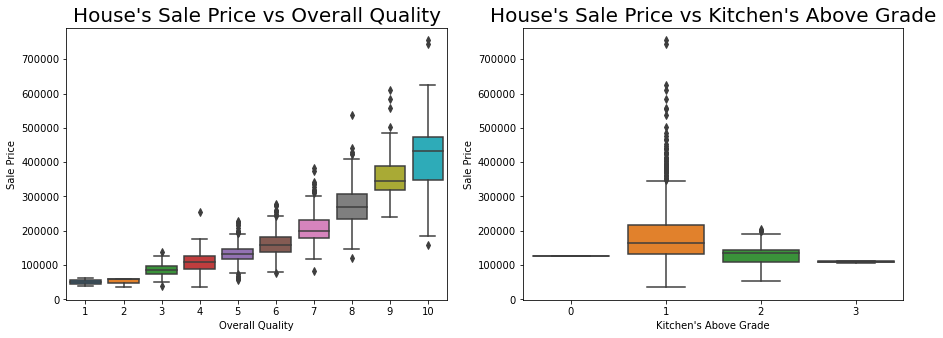

In [196]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df[max_corr_col],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df[min_corr_col],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title("House's Sale Price vs Overall Quality", fontsize = 20)
ax1.set_xlabel("Overall Quality")
ax1.set_ylabel("Sale Price")
ax2.set_title("House's Sale Price vs Kitchen's Above Grade", fontsize = 20)
ax2.set_xlabel("Kitchen's Above Grade")
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [197]:
# Replace None with appropriate text
"""
Overall Quality has the most positive correlation with a House's Sale Price. This graph shows a clear positive relationship 
between the two; as the rating goes closer to 10 (Very Excellent), the Sale Price moves up with it showing that better quality 
houses typically sell at a higher price than worse quality houses.

Kitchen's Above Grade has the most negative correlation with a House's Sale Price. This graph shows that the more kitchens a
house has the lower it seems to sell. Every house has a kitchen, so there aren't any houses in the 0 column. Houses with 3 kithens
seem to have sold around $100,000, houses with 2 kitchens mostly sold between $100,000 and $150,000 and houses with 1 kitchen
tpically sell between $150,000 and a little over $200,000 with many selling for more. I wonder how much strong this correlation
is because it appears that the vast majority of houses only have 1 kitchen. There may be other factors affecting the perceived
lower sale prices than just the number of kitchens.
"""

"\nOverall Quality has the most positive correlation with a House's Sale Price. This graph shows a clear positive relationship \nbetween the two; as the rating goes closer to 10 (Very Excellent), the Sale Price moves up with it showing that better quality \nhouses typically sell at a higher price than worse quality houses.\n\nKitchen's Above Grade has the most negative correlation with a House's Sale Price. This graph shows that the more kitchens a\nhouse has the lower it seems to sell. Every house has a kitchen, so there aren't any houses in the 0 column. Houses with 3 kithens\nseem to have sold around $100,000, houses with 2 kitchens mostly sold between $100,000 and $150,000 and houses with 1 kitchen\ntpically sell between $150,000 and a little over $200,000 with many selling for more. I wonder how much strong this correlation\nis because it appears that the vast majority of houses only have 1 kitchen. There may be other factors affecting the perceived\nlower sale prices than just th

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [198]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

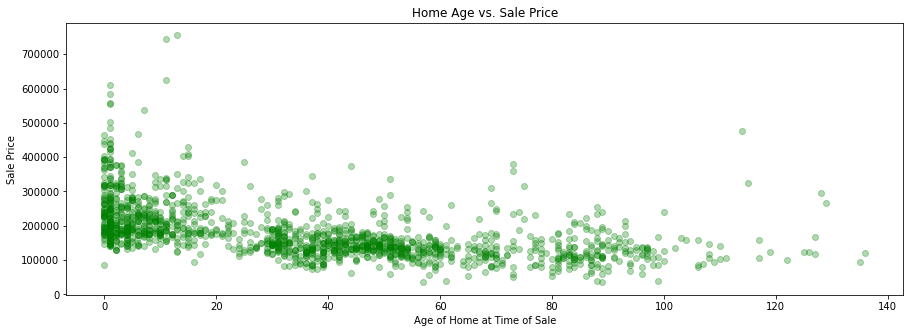

In [199]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [200]:
# Replace None with appropriate text
"""
There looks to be a slight relationship with the Age of a Home causing a decrease in Sale Price. It appears that more new houses
are being sold and sold for more than older houses. There seems to be more variance after 60 years and sale prices vary drastically
after a home is 100 years old. 

The largest clusters are with newer homes selling over $200,000 and older homes (around 30-50 years old) selling under $200,00. 
This makes sense with my personal biases where people may be spending less on older homes because they may be more of a 
'fixerupper.' A new house and an older house may have similar locations, square footage, rooms, etc but the older house may 
require new paint, new floors, newer appliances, etc.
"""

"\nThere looks to be a slight relationship with the Age of a Home causing a decrease in Sale Price. It appears that more new houses\nare being sold and sold for more than older houses. There seems to be more variance after 60 years and sale prices vary drastically\nafter a home is 100 years old. \n\nThe largest clusters are with newer homes selling over $200,000 and older homes (around 30-50 years old) selling under $200,00. \nThis makes sense with my personal biases where people may be spending less on older homes because they may be more of a \n'fixerupper.' A new house and an older house may have similar locations, square footage, rooms, etc but the older house may \nrequire new paint, new floors, newer appliances, etc.\n"

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.